# 2. Covid-19 Case and Death Rates By State - EDA

After cleaning and merging the datasets from our three raw datasets downloaded straight from the site, this notebook aims to explore the cleaned data for trends and correlations to use in our next step, the modeling and machine learning step.

## 2.1 Library Imports

In [1]:
import datetime
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Cleaned Data Import

In [2]:
cwd = os.getcwd()
cwd = cwd.replace('Notebook', 'clean_data')

In [3]:
merged_data = pd.read_csv(cwd + '\\merge_covid.csv', index_col='Unnamed: 0')

In [4]:
merged_data.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,inpatient_beds_used_covid,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed,...,total_admin,fully_vacc,fully_vacc_pop_perc,first_booster,tot_cases,new_case,prob_new_case,tot_death,new_death,prob_new_death
0,RI,2021-01-13,6,8,1,6,8,434.0,14,35.0,...,0.0,0.0,0.0,0.0,97783.0,978.0,0.0,1982.0,17.0,0.0
1,RI,2021-01-10,6,8,1,6,8,449.0,14,33.0,...,0.0,0.0,0.0,0.0,95372.0,1016.0,0.0,1934.0,10.0,0.0
2,MA,2021-01-09,12,89,1,14,87,2075.0,101,269.0,...,0.0,0.0,0.0,0.0,427135.0,7414.0,304.0,13259.0,76.0,1.0
3,PR,2021-01-08,0,3,64,0,3,458.0,66,36.0,...,0.0,0.0,0.0,0.0,84429.0,441.0,108.0,1618.0,19.0,5.0
4,SD,2021-01-07,2,60,3,2,60,247.0,62,23.0,...,0.0,0.0,0.0,0.0,102132.0,448.0,157.0,1544.0,25.0,4.0


## 2.3 Exploratory Data Analysis

I will be focusing on three different features to forecast with my machine learning model, and those are:
   1. inpatient_beds_used_covid
   2. new_case
   3. new_death
   
The rest of the features will be charted and explored over time aggregated by date to explore seasonality over the entirety of the U.S. The final dashboard will be filterable by state to more showcase the differences between the states.

### 2.3.1 State Differences

In [5]:
merged_data[merged_data['state']=='CA'][['date', 'tot_death']].sort_values('date')

,date,tot_death
16368,2020-02-04,0.0
13279,2020-02-05,0.0
14797,2020-02-06,0.0
20090,2020-02-07,0.0
13599,2020-02-08,0.0
...,...,...
28254,2022-09-20,94747.0
22575,2022-09-21,94747.0
32566,2022-09-22,95009.0
32355,2022-09-23,95009.0


In [6]:
merged_data[merged_data['state']=='CA'][['date', 'tot_cases']].sort_values('date')

,date,tot_cases
16368,2020-02-04,6.0
13279,2020-02-05,6.0
14797,2020-02-06,6.0
20090,2020-02-07,6.0
13599,2020-02-08,6.0
...,...,...
28254,2022-09-20,11184654.0
22575,2022-09-21,11184654.0
32566,2022-09-22,11214428.0
32355,2022-09-23,11220161.0


From checking the data, we can confirm that the tot_cases and tot_death features are a running total of deaths and cases for each state.

In [7]:
death_plot = merged_data.groupby('state')['tot_death'].max().reset_index()\
    .sort_values('tot_death').tail().set_index('state')
case_plot = merged_data.groupby('state')['tot_cases'].max().reset_index()\
    .sort_values('tot_cases').tail().set_index('state')

In [8]:
merged_data.groupby('state')['tot_death'].max().reset_index()\
    .sort_values('tot_death', ascending=False).set_index('state')

,tot_death
state,
CA,95009.0
TX,89093.0
FL,81206.0
PA,47098.0
GA,40171.0
OH,39767.0
IL,39624.0
MI,38464.0
NJ,34706.0


In [9]:
merged_data.groupby('state')['tot_cases'].max().reset_index()\
    .sort_values('tot_cases', ascending=False).set_index('state')

,tot_cases
state,
CA,11220161.0
TX,7852498.0
FL,7109027.0
IL,3751275.0
PA,3239298.0
NY,3216909.0
NC,3184984.0
OH,3131645.0
GA,2900354.0


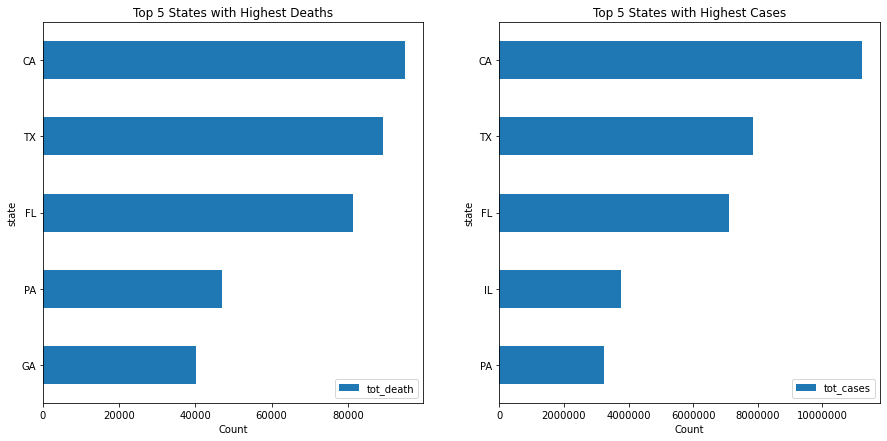

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(15)
death_plot.plot.barh(ax=ax[0])
case_plot.plot.barh(ax=ax[1])
ax[1].ticklabel_format(useOffset=False, style='plain', axis='x')
ax[0].set_title('Top 5 States with Highest Deaths')
ax[1].set_title('Top 5 States with Highest Cases')
ax[0].set_xlabel('Count')
ax[1].set_xlabel('Count')
plt.show()

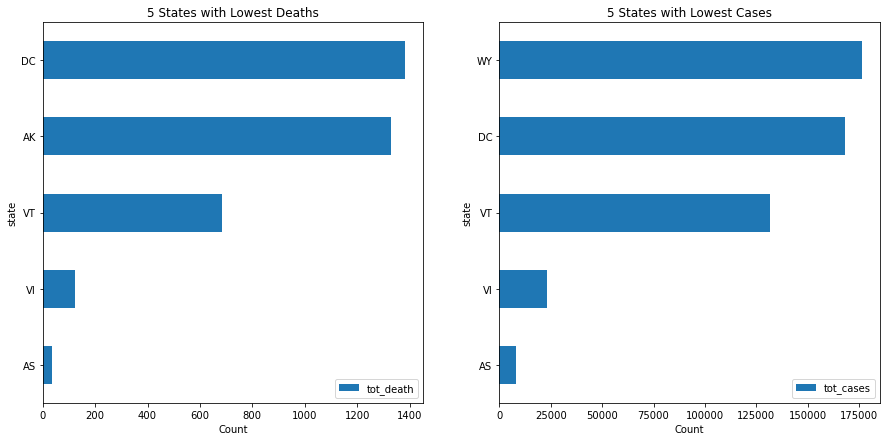

In [11]:
death_plot_bot = merged_data.groupby('state')['tot_death'].max().reset_index()\
    .sort_values('tot_death').head().set_index('state')
case_plot_bot = merged_data.groupby('state')['tot_cases'].max().reset_index()\
    .sort_values('tot_cases').head().set_index('state')

fig, ax = plt.subplots(1,2)
fig.set_figheight(7)
fig.set_figwidth(15)
death_plot_bot.plot.barh(ax=ax[0])
case_plot_bot.plot.barh(ax=ax[1])
ax[1].ticklabel_format(useOffset=False, style='plain', axis='x')
ax[0].set_title('5 States with Lowest Deaths')
ax[1].set_title('5 States with Lowest Cases')
ax[0].set_xlabel('Count')
ax[1].set_xlabel('Count')
plt.show()

We see that the top three states for both cases and deaths are California, Texas, and Florida.

The three lowest states for both cases and deaths are the Samoa territory, the Virgin Islands, and Vermont.

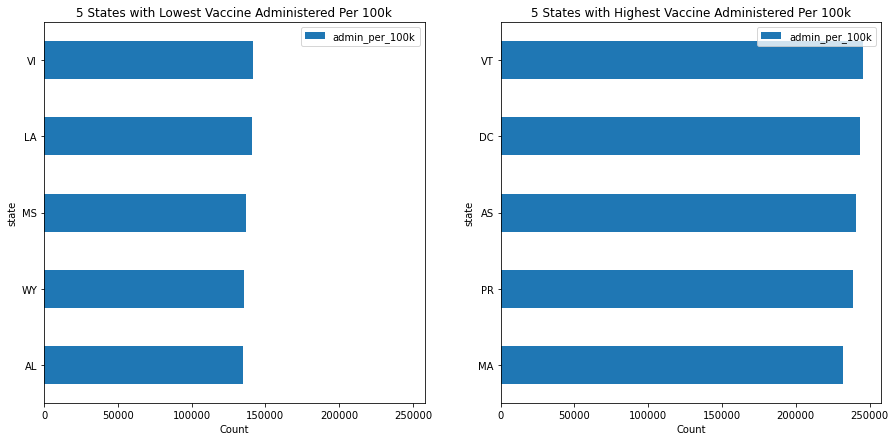

In [12]:
admin_per_100k_plot_top = merged_data.groupby('state')['admin_per_100k'].max().reset_index()\
    .sort_values('admin_per_100k').head().set_index('state')
admin_per_100k_plot_bot = merged_data.groupby('state')['admin_per_100k'].max().reset_index()\
    .sort_values('admin_per_100k').tail().set_index('state')

fig, ax = plt.subplots(1,2, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(15)
admin_per_100k_plot_top.plot.barh(ax=ax[0])
admin_per_100k_plot_bot.plot.barh(ax=ax[1])
ax[1].ticklabel_format(useOffset=False, style='plain', axis='x')
ax[0].set_title('5 States with Lowest Vaccine Administered Per 100k')
ax[1].set_title('5 States with Highest Vaccine Administered Per 100k')
ax[0].set_xlabel('Count')
ax[1].set_xlabel('Count')
plt.show()

Alabama, Wyoming, and Mississippi (states that are all in the south) have the lowest vaccine administration per 100k people.

The highest vaccine administration per 100k is in Vermont.

In [13]:
merged_data.groupby('state')['critical_staffing_shortage_today_yes'].agg('mean').sort_values(ascending=False).head()

state
CA    57.169671
TX    51.945808
LA    28.108742
GA    28.075693
OK    22.473348
Name: critical_staffing_shortage_today_yes, dtype: float64

On average, California, Texas and Louisiana have the highest hospitals reported with critical staffing shortages.

In [14]:
merged_data.groupby('state')['fully_vacc_pop_perc'].agg('max').sort_values(ascending=False).head(10)

state
AS    89.3
RI    85.3
PR    85.0
VT    83.2
ME    81.5
MA    81.2
CT    81.1
DC    80.2
HI    79.9
NY    78.8
Name: fully_vacc_pop_perc, dtype: float64

In [15]:
merged_data.groupby('state')['fully_vacc_pop_perc'].agg('max').sort_values(ascending=True).head(10)

state
WY    52.0
AL    52.3
MS    53.1
LA    54.4
VI    54.4
TN    55.6
AR    55.7
ID    56.1
GA    56.2
ND    56.8
Name: fully_vacc_pop_perc, dtype: float64

The states with the highest fully vaccinated population percentage tend to be states in the northeast.

The states with the lowerst fully vaccinated populations tend to be more rural states; Wymoning, Alabama, Mississippi.

### 2.3.2 Average Statistics Across all the States/U.S. Territories

In [16]:
merged_data.groupby('date')['tot_cases'].agg('mean')

date
2020-01-21             NaN
2020-01-22    0.000000e+00
2020-01-23    0.000000e+00
2020-01-24    0.000000e+00
2020-01-25    0.000000e+00
                  ...     
2022-09-20    1.715919e+06
2022-09-21    1.717391e+06
2022-09-22    1.719102e+06
2022-09-23    1.720071e+06
2022-09-24             NaN
Name: tot_cases, Length: 978, dtype: float64

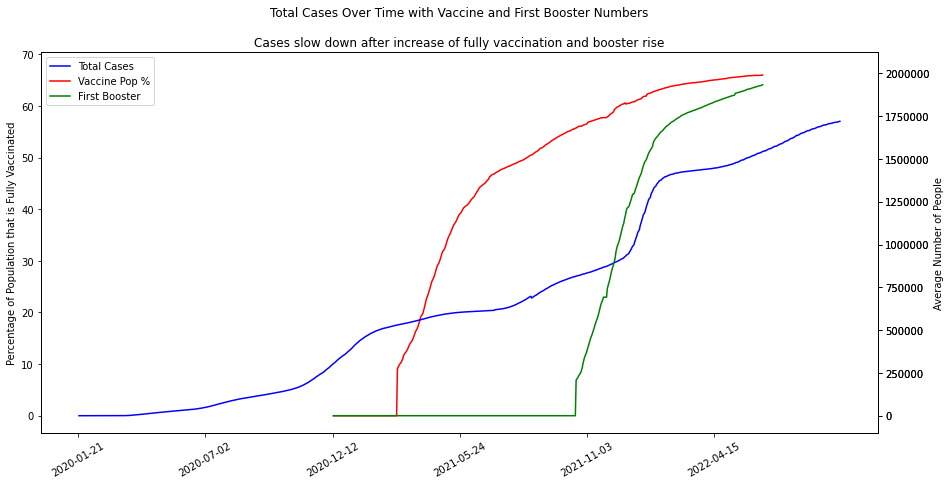

In [17]:
fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax1 = plt.subplot()
l1, = ax1.plot(merged_data.groupby('date')['fully_vacc_pop_perc'].agg('mean'), color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(merged_data.groupby('date')['tot_cases'].agg('mean'), color='blue')
ax3 = ax1.twinx()
l3, = ax3.plot(merged_data.groupby('date')['first_booster'].agg('mean'), color='green')
ax2.ticklabel_format(useOffset=False, style='plain', axis='y')
ax3.ticklabel_format(useOffset=False, style='plain', axis='y')
ax2.get_shared_y_axes().join(ax2, ax3)
plt.legend([l2, l1, l3], ["Total Cases", "Vaccine Pop %", 'First Booster'])
xticks = ax1.get_xticks()
ax1.set_xticks(xticks[::len(xticks) // 6])
ax1.tick_params(axis='x', rotation=30)
plt.title('''Total Cases Over Time with Vaccine and First Booster Numbers
            \nCases slow down after increase of fully vaccination and booster rise''')
plt.xlabel('Date')
plt.xticks(rotation=45)
ax1.set_ylabel('Percentage of Population that is Fully Vaccinated')
ax2.set_ylabel('Average Number of People')
plt.show()

The total number of cases shows occasional sharp increases, that seem to flatten out with the introduction of the vaccine and increase in the population percentage of fully vaccinated people. The same decrease in total case rate seems to happen with the increase of those receiving the First Booster.

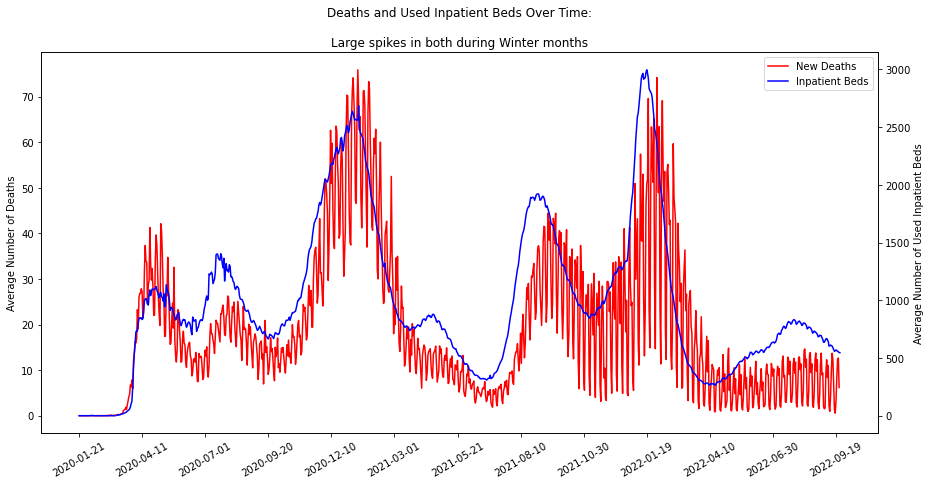

In [18]:
fig, ax1 = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax1 = plt.subplot()
l1, = ax1.plot(merged_data.groupby('date')['new_death'].agg('mean'), color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(merged_data.groupby('date')['inpatient_beds_used_covid'].agg('mean'), color='blue')
plt.xticks(rotation=45)
plt.legend([l1, l2], ["New Deaths", "Inpatient Beds"])
xticks = ax1.get_xticks()
ax1.set_xticks(xticks[::len(xticks) // 12])
ax1.tick_params(axis='x', rotation=30)
plt.title('''Deaths and Used Inpatient Beds Over Time:
            \nLarge spikes in both during Winter months''')
plt.xlabel('Date')
ax1.set_ylabel('Average Number of Deaths')
ax2.set_ylabel('Average Number of Used Inpatient Beds')
plt.show()

The average daily deaths and average used inpatient beds due to covid tend to follow the same patterns with similar peaks and lows at similar times of the year.

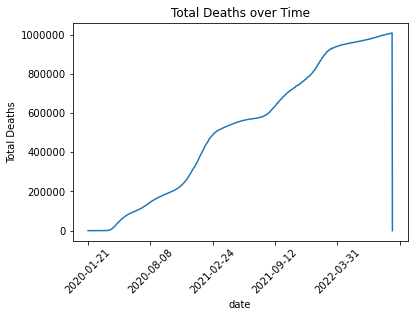

In [19]:
ax = merged_data.groupby('date')['tot_death'].agg('sum').plot()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.title('Total Deaths over Time')
plt.show()

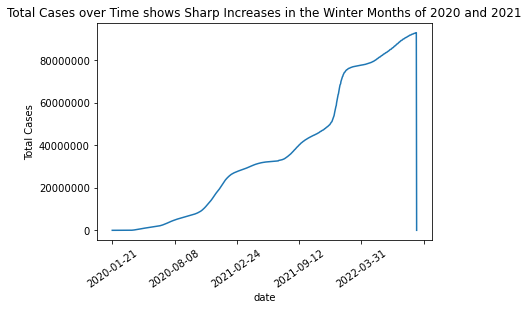

In [20]:
ax = merged_data.groupby('date')['tot_cases'].agg('sum').plot()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.ylabel('Total Cases')
plt.xticks(rotation=35)
plt.title('Total Cases over Time shows Sharp Increases in the Winter Months of 2020 and 2021')
plt.show()

Both total cases and deaths show a steep incline in the winter months. This may be due to more gatherings during the winter months or the ease of transmissions/affect on immune systems caused by lower temperatures.

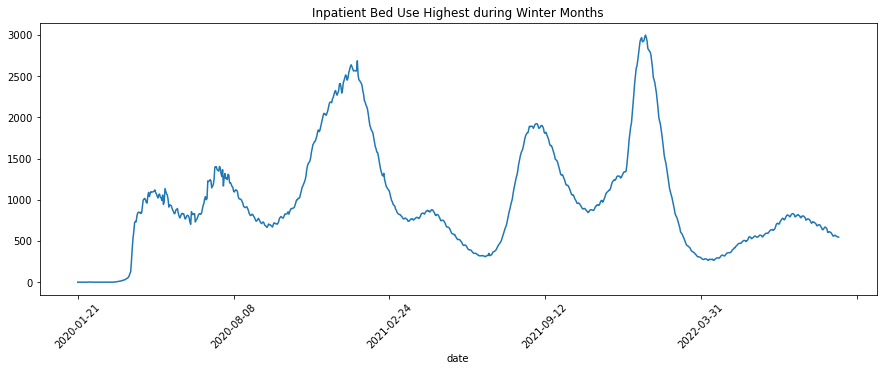

In [21]:
fig = plt.subplots(figsize=(15,5))
ax = merged_data.groupby('date')['inpatient_beds_used_covid'].agg('mean').plot()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Inpatient Bed Use Highest during Winter Months')
plt.show()

Showing more evidence of the correlation between inpatient bed use and cases/deaths, the inpatient bed use also peaks during winter months

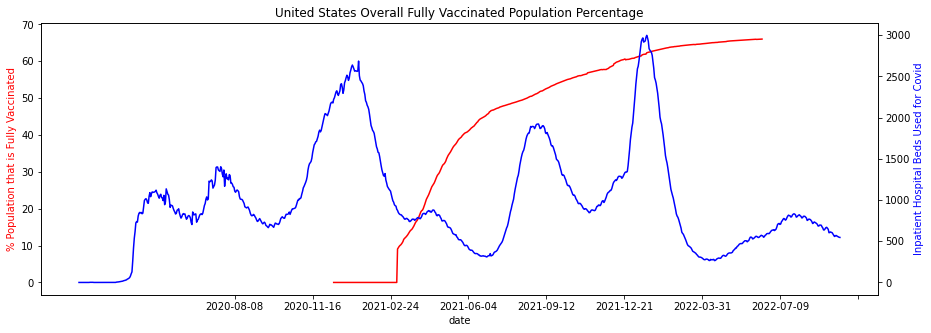

In [22]:
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1 = merged_data.groupby('date')['fully_vacc_pop_perc'].agg('mean').plot(color='red')
ax1.set_ylabel('% Population that is Fully Vaccinated', color = 'red') 
ax2 = ax1.twinx()
ax2 = merged_data.groupby('date')['inpatient_beds_used_covid'].agg('mean').plot(color='blue')
ax2.set_ylabel('Inpatient Hospital Beds Used for Covid', color = 'blue') 
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('United States Overall Fully Vaccinated Population Percentage')
plt.show()

We see the lowest Covid-19 hospital bed usage since the pandemic began after the introduction of the vaccine and as more of the population became fully vaccinated. As the vaccine effectiveness began to wear off and before boosters became FDA approved, we still saw spikes in inpatient hospital bed use during the fall and winter months.

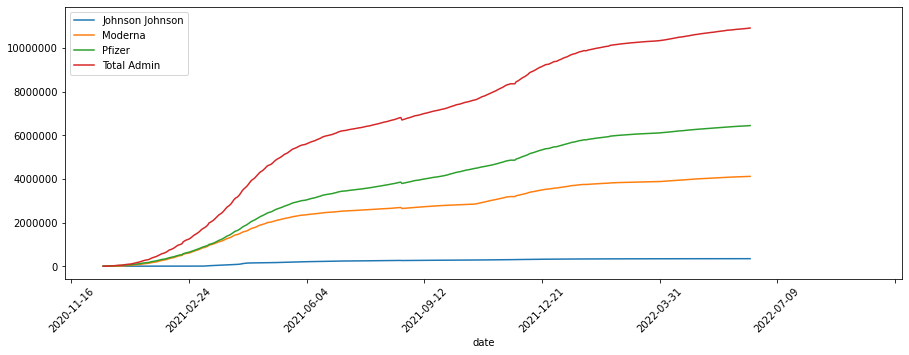

In [23]:
fig = plt.subplots(figsize=(15,5))
ax = merged_data.groupby('date')['administered_j'].agg('mean').plot()
ax = merged_data.groupby('date')['administered_m'].agg('mean').plot()
ax = merged_data.groupby('date')['administered_p'].agg('mean').plot()
ax = merged_data.groupby('date')['admin'].agg('mean').plot()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.legend(["Johnson Johnson", "Moderna", 'Pfizer', 'Total Admin'])
plt.xticks(rotation=45)
plt.show()

Most administered vaccines were Pfizer, followed by Moderna, with Johnson and Johnson on the bottom.


### 2.3.3 Correlations

We plot the correlation heatmap to view correlations between the 'new_death', 'new_cases', and 'inpatient_beds_used_covid' features and how their relationship with other variables.

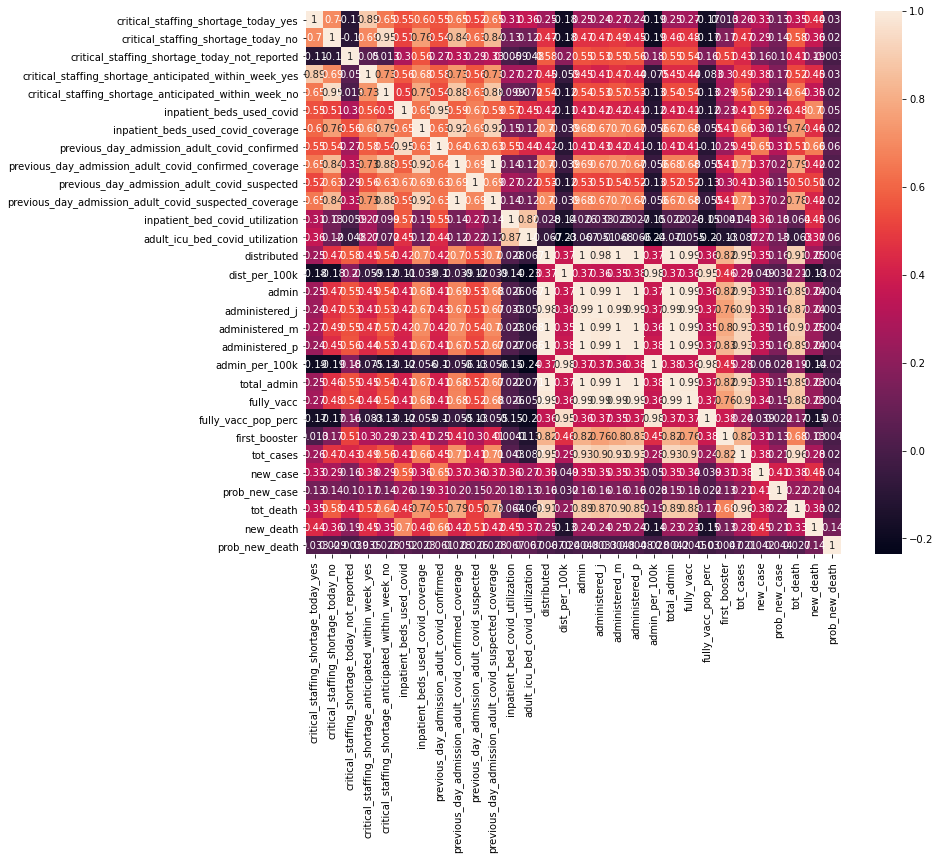

In [24]:
plt.subplots(figsize=(12,10))
sns.heatmap(merged_data.corr(),annot=True)
plt.show()

From the heatmap, we can see that the new_death, new_case, and inpatient_beds_used_covid columns have positive correlation values with the following columns:
   1. critical_staffing_shortage_today_yes
   2. inpatient_beds_used_covid
   3. previous_day_admission_adult_covid_confirmed
   4. previous_day_admission_adult_covid_suspected
   
And negative correlation values with
   1. fully_vacc_pop_perc
   2. admin_per_100k
   3. dist_per_100k
    

## 2.4 Continuation

Using the analysis and exploration from this notebook, the next notebook continues with the data transformation and modeling. The finished model and predicted values will be exported from our next notebook and used in our dashboard.